# Import the libraries

In [49]:
# install the opencage to get the geocoordinates for each country
#%pip install opencage
# install pycountry to get the ISO country code
#%pip install pycountry


In [3]:
# Dependencies
import pandas as pd
from functools import reduce
from pathlib import Path
from opencage.geocoder import OpenCageGeocode
# For interactive visualisations
import plotly.express as px
from ipywidgets import interact, IntSlider
import pycountry # to convert numeric code to ISO country code used by plotly
# for using geopandas and matplotlib
import geopandas as gpd
import matplotlib.pyplot as plt


# Define paths and read files

In [4]:
# Store filepath in a variable
file_one = Path("cleaneddata/morticd10_part4_cleaned_df.csv")
file_two = Path("cleaneddata/morticd10_part5_cleaned_df.csv")
file_3 = Path("data/country_codes.csv")

In [5]:
# Read our data file with the Pandas library
# Not every CSV requires an encoding, but be aware this can come up
morticd10_part4_df = pd.read_csv(file_one, encoding="ISO-8859-1")
morticd10_part5_df = pd.read_csv(file_two, encoding="ISO-8859-1")
country_code_df = pd.read_csv(file_3, encoding="ISO-8859-1")


# Understanding/analysing the data files

In [6]:
country_code_df.head()

,ï»¿country,name
0,1010,Algeria
1,1020,Angola
2,1025,Benin
3,1030,Botswana
4,1035,Burkina Faso


In [7]:
morticd10_part4_df.head()

,Country,Year,List,Cause,Sex,Deaths1,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,mort_1_4,mort_5_24,mort_25_44,mort_45_64,mort_65_84,mort_85_95+,Deaths26
0,1400,2013,101,1000,1,383,5.0,1.0,2.0,4.0,0.0,6.0,44.0,103.0,218.0,0.0,0.0
1,1400,2013,101,1000,2,334,2.0,7.0,3.0,5.0,2.0,3.0,20.0,60.0,232.0,0.0,0.0
2,1400,2013,101,1001,1,28,0.0,0.0,0.0,0.0,0.0,0.0,6.0,11.0,11.0,0.0,0.0
3,1400,2013,101,1001,2,30,0.0,2.0,2.0,1.0,0.0,0.0,0.0,6.0,19.0,0.0,0.0
4,1400,2013,101,1002,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
morticd10_part4_df.tail()

,Country,Year,List,Cause,Sex,Deaths1,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,mort_1_4,mort_5_24,mort_25_44,mort_45_64,mort_65_84,mort_85_95+,Deaths26
880537,5020,2016,104,Y870,2,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
880538,5020,2016,104,Y883,1,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0
880539,5020,2016,104,Y883,2,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,0.0
880540,5020,2016,104,Y899,1,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0
880541,5020,2016,104,Y899,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [9]:
morticd10_part4_df.describe()

,Country,Year,List,Sex,Deaths1,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,mort_1_4,mort_5_24,mort_25_44,mort_45_64,mort_65_84,mort_85_95+,Deaths26
count,880542.000000,880542.000000,880542.000000,880542.000000,8.805420e+05,880542.000000,880542.000000,880542.000000,880542.000000,880542.000000,880542.000000,880542.000000,880542.000000,880542.000000,880542.000000,880542.000000
mean,3290.977342,2014.516668,103.895816,1.505759,1.859584e+02,1.474158,0.481073,0.366425,0.795786,0.711366,3.527158,11.642251,36.732208,80.952436,48.968789,0.190336
std,996.936375,1.119779,0.352870,0.690659,6.855915e+03,77.560580,23.299605,20.440840,47.490539,30.436828,161.114757,527.865395,1504.495546,3022.707691,2099.165613,13.785934
min,1125.000000,2013.000000,101.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2310.000000,2014.000000,104.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3380.000000,2015.000000,104.000000,1.000000,3.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,4186.000000,2016.000000,104.000000,2.000000,1.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,4.000000,2.000000,0.000000
max,5150.000000,2016.000000,104.000000,9.000000,1.400232e+06,20191.000000,6260.000000,5848.000000,12251.000000,6879.000000,46997.000000,138034.000000,348850.000000,617561.000000,537997.000000,4599.000000


In [10]:
morticd10_part5_df.head()

,Country_code,Year,List,Cause,Sex,Total_deaths,Mort_day0,Mort_day1_6,Mort_day7_27,Mort_day28_365,mort_1_4,mort_5_24,mort_25_44,mort_45_64,mort_65_84,mort_85_95+,Deaths26
0,4303,2017,101,1000,1,281784,1608.0,0.0,0.0,0.0,357.0,2593.0,26494.0,86787.0,134693.0,29184.0,68.0
1,4303,2017,101,1000,2,292339,1178.0,0.0,0.0,0.0,241.0,998.0,9009.0,37295.0,155328.0,88271.0,19.0
2,4303,2017,101,1001,1,6198,41.0,0.0,0.0,0.0,29.0,65.0,3019.0,2670.0,358.0,15.0,1.0
3,4303,2017,101,1001,2,2516,29.0,0.0,0.0,0.0,19.0,51.0,1317.0,808.0,263.0,29.0,0.0
4,4303,2017,101,1002,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
morticd10_part5_df.tail()

,Country_code,Year,List,Cause,Sex,Total_deaths,Mort_day0,Mort_day1_6,Mort_day7_27,Mort_day28_365,mort_1_4,mort_5_24,mort_25_44,mort_45_64,mort_65_84,mort_85_95+,Deaths26
1023255,5020,2022,104,Y871,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1023256,5020,2022,104,Y883,1,4,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0
1023257,5020,2022,104,Y883,2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0
1023258,5020,2022,104,Y890,2,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1023259,5020,2022,104,Y899,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
morticd10_part5_df.describe()

,Country_code,Year,List,Sex,Total_deaths,Mort_day0,Mort_day1_6,Mort_day7_27,Mort_day28_365,mort_1_4,mort_5_24,mort_25_44,mort_45_64,mort_65_84,mort_85_95+,Deaths26
count,1.023260e+06,1.023260e+06,1.023260e+06,1.023260e+06,1.023260e+06,1.023260e+06,1.023260e+06,1.023260e+06,1.023260e+06,1.023260e+06,1.023260e+06,1.023260e+06,1.023260e+06,1.023260e+06,1.023260e+06,1.023260e+06
mean,3.330242e+03,2.018914e+03,1.039318e+02,1.513440e+00,1.857104e+02,8.273479e-01,3.952221e-01,3.060483e-01,6.313772e-01,4.940220e-01,2.809164e+00,1.010587e+01,3.435569e+01,8.171510e+01,5.351241e+01,1.788304e-01
std,9.656538e+02,1.460590e+00,2.947823e-01,7.180351e-01,7.310517e+03,5.061027e+01,2.087597e+01,1.785351e+01,3.636003e+01,2.360656e+01,1.472108e+02,5.019237e+02,1.508388e+03,3.238104e+03,2.324742e+03,1.345978e+01
min,1.125000e+03,2.017000e+03,1.010000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.310000e+03,2.018000e+03,1.040000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.400000e+03,2.019000e+03,1.040000e+02,1.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,4.186000e+03,2.020000e+03,1.040000e+02,2.000000e+00,1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00,2.000000e+00,0.000000e+00
max,5.198000e+03,2.022000e+03,1.040000e+02,9.000000e+00,1.838108e+06,1.984600e+04,5.676000e+03,5.954000e+03,1.065800e+04,6.046000e+03,4.692900e+04,1.394990e+05,4.287350e+05,8.513300e+05,6.178850e+05,3.863000e+03


In [13]:
part5_cols = morticd10_part5_df.columns
part5_cols

Index(['Country_code', 'Year', 'List', 'Cause', 'Sex', 'Total_deaths',
       'Mort_day0', 'Mort_day1_6', 'Mort_day7_27', 'Mort_day28_365',
       'mort_1_4', 'mort_5_24', 'mort_25_44', 'mort_45_64', 'mort_65_84',
       'mort_85_95+', 'Deaths26'],
      dtype='object')

In [14]:
part4_cols = morticd10_part4_df.columns
part4_cols

Index(['Country', 'Year', 'List', 'Cause', 'Sex', 'Deaths1', 'IM_Deaths1',
       'IM_Deaths2', 'IM_Deaths3', 'IM_Deaths4', 'mort_1_4', 'mort_5_24',
       'mort_25_44', 'mort_45_64', 'mort_65_84', 'mort_85_95+', 'Deaths26'],
      dtype='object')

In [15]:
# Renaming some columns for part4
morticd10_part4_df= morticd10_part4_df.rename(columns = {'Country' : 'Country_code',
                                                      'Deaths1' : "Total_deaths", 'IM_Deaths1' : 'Mort_day0',
                                                      'IM_Deaths2' : 'Mort_day1_6' , 
                                                      'IM_Deaths3' : 'Mort_day7_27',
                                                      'IM_Deaths4': 'Mort_day28_365'})
morticd10_part4_df

,Country_code,Year,List,Cause,Sex,Total_deaths,Mort_day0,Mort_day1_6,Mort_day7_27,Mort_day28_365,mort_1_4,mort_5_24,mort_25_44,mort_45_64,mort_65_84,mort_85_95+,Deaths26
0,1400,2013,101,1000,1,383,5.0,1.0,2.0,4.0,0.0,6.0,44.0,103.0,218.0,0.0,0.0
1,1400,2013,101,1000,2,334,2.0,7.0,3.0,5.0,2.0,3.0,20.0,60.0,232.0,0.0,0.0
2,1400,2013,101,1001,1,28,0.0,0.0,0.0,0.0,0.0,0.0,6.0,11.0,11.0,0.0,0.0
3,1400,2013,101,1001,2,30,0.0,2.0,2.0,1.0,0.0,0.0,0.0,6.0,19.0,0.0,0.0
4,1400,2013,101,1002,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880537,5020,2016,104,Y870,2,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
880538,5020,2016,104,Y883,1,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0
880539,5020,2016,104,Y883,2,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,0.0
880540,5020,2016,104,Y899,1,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0


### Section to determine the most deadly causes.Keepking only the Total_deaths column together with Country_code, Year, list, Cause, Sex 


In [16]:
part4_cols = morticd10_part4_df.columns
part4_cols

Index(['Country_code', 'Year', 'List', 'Cause', 'Sex', 'Total_deaths',
       'Mort_day0', 'Mort_day1_6', 'Mort_day7_27', 'Mort_day28_365',
       'mort_1_4', 'mort_5_24', 'mort_25_44', 'mort_45_64', 'mort_65_84',
       'mort_85_95+', 'Deaths26'],
      dtype='object')

In [17]:
#Keeping only desired columns to study the total deaths per cause
morticd10_part4_totaldeath_df = morticd10_part4_df[['Country_code', 'Year', 'Cause', 'Sex', 'Total_deaths']]
morticd10_part4_totaldeath_df

,Country_code,Year,Cause,Sex,Total_deaths
0,1400,2013,1000,1,383
1,1400,2013,1000,2,334
2,1400,2013,1001,1,28
3,1400,2013,1001,2,30
4,1400,2013,1002,1,0
...,...,...,...,...,...
880537,5020,2016,Y870,2,2
880538,5020,2016,Y883,1,6
880539,5020,2016,Y883,2,7
880540,5020,2016,Y899,1,6


In [18]:
#Keeping only desired columns to study the total deaths per cause
morticd10_part5_totaldeath_df = morticd10_part5_df[['Country_code', 'Year', 'Cause', 'Sex', 'Total_deaths']]
morticd10_part5_totaldeath_df

,Country_code,Year,Cause,Sex,Total_deaths
0,4303,2017,1000,1,281784
1,4303,2017,1000,2,292339
2,4303,2017,1001,1,6198
3,4303,2017,1001,2,2516
4,4303,2017,1002,1,0
...,...,...,...,...,...
1023255,5020,2022,Y871,1,1
1023256,5020,2022,Y883,1,4
1023257,5020,2022,Y883,2,3
1023258,5020,2022,Y890,2,1


## Get the total death per cause group

In [20]:
# Exclude the causes 'AAA' and '1000' as they represent total death for all causes combined
excluded_causes = ['AAA', '1000']
filtered_df = morticd10_part4_totaldeath_df[~morticd10_part4_totaldeath_df['Cause'].isin(excluded_causes)]

# Extract the first character of each cause
filtered_df['Cause_Group'] = filtered_df['Cause'].str[0]

# Aggregate total deaths by cause group across all years
total_deaths_by_cause_group = filtered_df.groupby('Cause_Group')['Total_deaths'].sum().reset_index()

# Rename columns for clarity
total_deaths_by_cause_group.columns = ['Cause_Group', 'Total_Deaths']

# Sort by total deaths in descending order (optional)
total_deaths_by_cause_group_part4 = total_deaths_by_cause_group.sort_values(by='Total_Deaths', ascending=False)

# Display the result
print(total_deaths_by_cause_group_part4)

   Cause_Group  Total_Deaths
9            I      21776439
0            1      17513087
3            C      14528586
10           J       6907036
18           R       3465155
11           K       3159159
5            E       2998367
7            G       2546231
22           X       2225588
6            F       1965715
14           N       1775409
1            A       1533359
21           W       1106109
20           V       1020899
4            D        779485
2            B        641768
16           P        607251
23           Y        583157
17           Q        392308
13           M        334198
12           L        161849
15           O         41088
8            H          5088
19           U            68


C:\Users\Owner\AppData\Local\Temp\ipykernel_26376\2849450879.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cause_Group'] = filtered_df['Cause'].str[0]


In [21]:
# Exclude the causes 'AAA' and '1000' as they represent total death for all causes combined
excluded_causes = ['AAA', '1000']
filtered_df = morticd10_part5_totaldeath_df[~morticd10_part5_totaldeath_df['Cause'].isin(excluded_causes)]

# Extract the first character of each cause
filtered_df['Cause_Group'] = filtered_df['Cause'].str[0]

# Aggregate total deaths by cause group across all years
total_deaths_by_cause_group = filtered_df.groupby('Cause_Group')['Total_deaths'].sum().reset_index()

# Rename columns for clarity
total_deaths_by_cause_group.columns = ['Cause_Group', 'Total_Deaths']

# Sort by total deaths in descending order (optional)
total_deaths_by_cause_group_part5 = total_deaths_by_cause_group.sort_values(by='Total_Deaths', ascending=False)

# Display the result
print(total_deaths_by_cause_group_part5)

   Cause_Group  Total_Deaths
9            I      24954863
3            C      17045676
0            1      13891869
10           J       8222184
18           R       4250594
5            E       3818856
11           K       3751251
7            G       3700066
19           U       3523844
22           X       2750319
6            F       2616724
14           N       2190853
1            A       1561760
21           W       1346492
20           V       1009946
4            D        930173
23           Y        621679
2            B        548733
16           P        520725
13           M        435683
17           Q        376375
12           L        240604
15           O         44188
8            H          6295


C:\Users\Owner\AppData\Local\Temp\ipykernel_26376\1060531729.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Cause_Group'] = filtered_df['Cause'].str[0]


# Studying the country code and adding geocoordinates

In [22]:
country_code_df

,ï»¿country,name
0,1010,Algeria
1,1020,Angola
2,1025,Benin
3,1030,Botswana
4,1035,Burkina Faso
...,...,...
222,5197,Samoa
223,5198,Solomon Islands
224,5200,Tonga
225,5205,Tuvalu


In [23]:
# Renaming the country column to Country_code
country_code_df= country_code_df.rename(columns = {'ï»¿country' : 'Country_code',
                                                   'name' : 'Country_name'})
country_code_df

,Country_code,Country_name
0,1010,Algeria
1,1020,Angola
2,1025,Benin
3,1030,Botswana
4,1035,Burkina Faso
...,...,...
222,5197,Samoa
223,5198,Solomon Islands
224,5200,Tonga
225,5205,Tuvalu


## Coverting the numeric country code to ISO country codes

In [24]:
# Function to fetch ISO Alpha-3 codes using pycountry
def get_iso_alpha3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None  # Return None if the country name is not found

# Add ISO_Alpha3 column
country_code_df['ISO_Alpha3'] = country_code_df['Country_name'].apply(get_iso_alpha3)

# Display the updated DataFrame
country_code_df.head()

,Country_code,Country_name,ISO_Alpha3
0,1010,Algeria,DZA
1,1020,Angola,AGO
2,1025,Benin,BEN
3,1030,Botswana,BWA
4,1035,Burkina Faso,BFA


In [25]:
morticd10_part5_totaldeath_df.head()

,Country_code,Year,Cause,Sex,Total_deaths
0,4303,2017,1000,1,281784
1,4303,2017,1000,2,292339
2,4303,2017,1001,1,6198
3,4303,2017,1001,2,2516
4,4303,2017,1002,1,0


## Merge the mortality data with country dataframe

In [26]:
# Merge the mortality dataframe with the country data
# Match by 'Country_code' from the CSV and 'Country_code' from the world dataset
part5_country_mortality_df = pd.merge(
    country_code_df,
    morticd10_part5_totaldeath_df,
    left_on='Country_code',
    right_on='Country_code',
    how='left'
)
part5_country_mortality_df.head(10)

,Country_code,Country_name,ISO_Alpha3,Year,Cause,Sex,Total_deaths
0,1010,Algeria,DZA,NaN,NaN,NaN,NaN
1,1020,Angola,AGO,NaN,NaN,NaN,NaN
2,1025,Benin,BEN,NaN,NaN,NaN,NaN
3,1030,Botswana,BWA,NaN,NaN,NaN,NaN
4,1035,Burkina Faso,BFA,NaN,NaN,NaN,NaN
5,1040,Burundi,BDI,NaN,NaN,NaN,NaN
6,1045,Cameroon,CMR,NaN,NaN,NaN,NaN
7,1060,Cape Verde,None,NaN,NaN,NaN,NaN
8,1070,Central African Republic,CAF,NaN,NaN,NaN,NaN
9,1080,Chad,TCD,NaN,NaN,NaN,NaN


In [27]:
part5_country_mortality_df.tail()

,Country_code,Country_name,ISO_Alpha3,Year,Cause,Sex,Total_deaths
1023361,5198,Solomon Islands,SLB,2018.0,W749,2.0,1.0
1023362,5198,Solomon Islands,SLB,2018.0,Y349,2.0,3.0
1023363,5200,Tonga,TON,NaN,NaN,NaN,NaN
1023364,5205,Tuvalu,TUV,NaN,NaN,NaN,NaN
1023365,5207,Vanuatu,VUT,NaN,NaN,NaN,NaN


In [28]:
# Drop rows containing NaN values
cleaned_part5_country_mortality_df = part5_country_mortality_df.dropna()
cleaned_part5_country_mortality_df

,Country_code,Country_name,ISO_Alpha3,Year,Cause,Sex,Total_deaths
14,1125,Egypt,EGY,2017.0,A00,1.0,3.0
15,1125,Egypt,EGY,2017.0,A01,1.0,26.0
16,1125,Egypt,EGY,2017.0,A02,1.0,9.0
17,1125,Egypt,EGY,2017.0,A03,1.0,1.0
18,1125,Egypt,EGY,2017.0,A04,1.0,41.0
...,...,...,...,...,...,...,...
1023358,5198,Solomon Islands,SLB,2018.0,R104,2.0,1.0
1023359,5198,Solomon Islands,SLB,2018.0,R900,2.0,1.0
1023360,5198,Solomon Islands,SLB,2018.0,R99,2.0,2.0
1023361,5198,Solomon Islands,SLB,2018.0,W749,2.0,1.0


# Save the part5 total death with Alpha3 

In [29]:
# Export file as a CSV, without the Pandas index, but with the header

cleaned_part5_country_mortality_df.to_csv("cleaneddata/cleaned_part5_country_mortality_df.csv", index=False, header=True)

## Function to visualize deaths for a selected cause

In [ ]:
# Function to visualize deaths for a selected cause
def visualize_cause_deaths(cause):
    # Filter data for the selected cause
    cause_data = cleaned_part5_country_mortality_df[cleaned_part5_country_mortality_df['Cause'] == cause]
    
    # Aggregate total deaths by country for the selected cause
    country_death_data = cause_data.groupby('ISO_Alpha3')['Total_deaths'].sum().reset_index()
    
    # Rename columns for clarity
    country_death_data.columns = ['ISO_Alpha3', 'Total_Deaths']
    
    # Plot the data on a map
    fig = px.scatter_geo(
        country_death_data,
        locations='ISO_Alpha3',  # Country codes (ISO Alpha-3 recommended)
        size='Total_Deaths',
        title=f'Total Deaths for Cause: {cause}',
        projection='natural earth',
        size_max=50,
        hover_name='ISO_Alpha3',
    )
    fig.update_geos(showcountries=True, showframe=True)
    fig.show()

# List of unique causes for dropdown menu
unique_causes = cleaned_part5_country_mortality_df['Cause'].unique()

# Create an interactive dropdown to select a cause
interact(visualize_cause_deaths, cause=unique_causes)

## Function to visualize deaths for a selected cause and year

In [ ]:
# Function to visualize deaths for a selected cause and year
def visualize_cause_deaths(cause, year):
    # Filter data for the selected cause and year
    filtered_data = cleaned_part5_country_mortality_df[
        (cleaned_part5_country_mortality_df['Cause'] == cause) & 
        (cleaned_part5_country_mortality_df['Year'] == year)
    ]
    
    # Aggregate total deaths by country for the selected cause and year
    country_death_data = filtered_data.groupby('ISO_Alpha3')['Total_deaths'].sum().reset_index()
    
    # Rename columns for clarity
    country_death_data.columns = ['ISO_Alpha3', 'Total_Deaths']
    
    # Plot the data on a map
    fig = px.scatter_geo(
        country_death_data,
        locations='ISO_Alpha3',  # Country codes (ISO Alpha-3 recommended)
        size='Total_Deaths',
        title=f'Total Deaths for Cause: {cause} in Year: {year}',
        projection='natural earth',
        size_max=50,
        hover_name='ISO_Alpha3',
    )
    fig.update_geos(showcountries=True, showframe=True)
    fig.show()

# List of unique causes and years for dropdown menus
unique_causes = cleaned_part5_country_mortality_df['Cause'].unique()
unique_years = cleaned_part5_country_mortality_df['Year'].dropna().unique()

# Create an interactive dropdown to select a cause and a year
interact(visualize_cause_deaths, cause=unique_causes, year=unique_years)

## Adding code to make bubbles of each country to have different colors

In [ ]:
# Function to visualize deaths for a selected cause and year
def visualize_cause_deaths(cause, year):
    # Filter data for the selected cause and year
    filtered_data = cleaned_part5_country_mortality_df[
        (cleaned_part5_country_mortality_df['Cause'] == cause) & 
        (cleaned_part5_country_mortality_df['Year'] == year)
    ]
    
    # Check if there is data to display
    if filtered_data.empty:
        print(f"No data available for Cause: {cause} in Year: {year}")
        return
    
    # Aggregate total deaths by country for the selected cause and year
    country_death_data = filtered_data.groupby('ISO_Alpha3')['Total_deaths'].sum().reset_index()
    country_death_data.columns = ['ISO_Alpha3', 'Total_Deaths']
    
    # Assign unique colors to each country
    country_death_data['Country_Color'] = country_death_data['ISO_Alpha3']
    
    # Plot the data on a map
    fig = px.scatter_geo(
        country_death_data,
        locations='ISO_Alpha3', 
        size='Total_Deaths',
        color='Country_Color',  # Different color for each country
        title=f'Total Deaths for Cause: {cause} in Year: {year}',
        projection='natural earth',
        size_max=50,
        hover_name='ISO_Alpha3',
    )
    fig.update_geos(showcountries=True, showframe=True)
    fig.show()

# List of unique causes and years for dropdown menus
unique_causes = sorted(cleaned_part5_country_mortality_df['Cause'].unique())
unique_years = sorted(cleaned_part5_country_mortality_df['Year'].dropna().unique())

# Create an interactive dropdown to select a cause and a year
interact(visualize_cause_deaths, cause=unique_causes, year=unique_years)

## Adding a slider horizontal bar to choose the year

In [ ]:
# Function to visualize deaths for a selected cause and year
def visualize_cause_deaths(cause, year):
    # Filter data for the selected cause and year
    filtered_data = cleaned_part5_country_mortality_df[
        (cleaned_part5_country_mortality_df['Cause'] == cause) & 
        (cleaned_part5_country_mortality_df['Year'] == year)
    ]
    
    # Check if there is data to display
    if filtered_data.empty:
        print(f"No data available for Cause: {cause} in Year: {year}")
        return
    
    # Aggregate total deaths by country for the selected cause and year
    country_death_data = filtered_data.groupby('ISO_Alpha3')['Total_deaths'].sum().reset_index()
    country_death_data.columns = ['ISO_Alpha3', 'Total_Deaths']
    
    # Plot the data on a map
    fig = px.scatter_geo(
        country_death_data,
        locations='ISO_Alpha3', 
        size='Total_Deaths',
        color='ISO_Alpha3',  # Different color for each country
        title=f'Total Deaths for Cause: {cause} in Year: {year}',
        projection='natural earth',
        size_max=50,
        hover_name='ISO_Alpha3',
    )
    fig.update_geos(showcountries=True, showframe=True)
    fig.show()

# List of unique causes and years for dropdown and slider
unique_causes = sorted(cleaned_part5_country_mortality_df['Cause'].unique())
min_year = int(cleaned_part5_country_mortality_df['Year'].min())
max_year = int(cleaned_part5_country_mortality_df['Year'].max())

# Create an interactive dropdown for cause and slider for year
interact(
    visualize_cause_deaths, 
    cause=unique_causes, 
    year=IntSlider(min=min_year, max=max_year, step=1, value=min_year, description='Year')
)

## Making visualizations based on cause_group

In [36]:
# Function to visualize deaths for a grouped cause and year
def visualize_grouped_cause_deaths(cause_group, year):
    # Add a new column for the first character of the cause
    cleaned_part5_country_mortality_df['Cause_Group'] = cleaned_part5_country_mortality_df['Cause'].str[0]
    
    # Filter data for the selected cause group and year
    filtered_data = cleaned_part5_country_mortality_df[
        (cleaned_part5_country_mortality_df['Cause_Group'] == cause_group) & 
        (cleaned_part5_country_mortality_df['Year'] == year)
    ]
    
    # Check if there is data to display
    if filtered_data.empty:
        print(f"No data available for Cause Group: {cause_group} in Year: {year}")
        return
    
    # Aggregate total deaths by country for the selected cause group and year
    country_death_data = filtered_data.groupby('ISO_Alpha3')['Total_deaths'].sum().reset_index()
    country_death_data.columns = ['ISO_Alpha3', 'Total_Deaths']
    
    # Plot the data on a map
    fig = px.scatter_geo(
        country_death_data,
        locations='ISO_Alpha3', 
        size='Total_Deaths',
        color='ISO_Alpha3',  # Different color for each country
        title=f'Total Deaths for Cause Group: {cause_group} in Year: {year}',
        projection='natural earth',
        size_max=50,
        hover_name='ISO_Alpha3',
    )
    fig.update_geos(showcountries=True, showframe=True)
    fig.show()

# Create a list of unique cause groups and years for dropdown and slider
unique_cause_groups = sorted(cleaned_part5_country_mortality_df['Cause'].str[0].unique())
min_year = int(cleaned_part5_country_mortality_df['Year'].min())
max_year = int(cleaned_part5_country_mortality_df['Year'].max())

# Create an interactive dropdown for cause group and slider for year
interact(
    visualize_grouped_cause_deaths, 
    cause_group=unique_cause_groups, 
    year=IntSlider(min=min_year, max=max_year, step=1, value=min_year, description='Year')
)

interactive(children=(Dropdown(description='cause_group', options=('1', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'…

<function __main__.visualize_grouped_cause_deaths(cause_group, year)>

## Section to add geocoordinates (Latitude and Longitude information to the country_code dataframe)

In [37]:


# OpenCage API Key
api_key = 'db93da1e2d1e4512a1170f38d537eea0'  # Replace with your OpenCage API key
geocoder = OpenCageGeocode(api_key)

# Function to get geo-coordinates
def get_coordinates(country_name):
    result = geocoder.geocode(country_name)
    if result:
        return result[0]['geometry']['lat'], result[0]['geometry']['lng']
    return None, None

# Add latitude and longitude columns
country_code_df['Latitude'], country_code_df['Longitude'] = zip(*country_code_df['Country_name'].apply(get_coordinates))

print(country_code_df)

     Country_code     Country_name   Latitude   Longitude
0            1010          Algeria  28.000027    2.999983
1            1020           Angola -11.877577   17.569124
2            1025            Benin   9.529347    2.258441
3            1030         Botswana -23.168178   24.592874
4            1035     Burkina Faso  12.075308   -1.688031
..            ...              ...        ...         ...
222          5197            Samoa -13.769390 -172.120050
223          5198  Solomon Islands  -8.705394  159.107069
224          5200            Tonga -19.916082 -175.202642
225          5205           Tuvalu  -8.640521  179.158292
226          5207          Vanuatu -16.525507  168.106915

[227 rows x 4 columns]


In [38]:
country_code_with_geocode_df = country_code_df
country_code_with_geocode_df

,Country_code,Country_name,Latitude,Longitude
0,1010,Algeria,28.000027,2.999983
1,1020,Angola,-11.877577,17.569124
2,1025,Benin,9.529347,2.258441
3,1030,Botswana,-23.168178,24.592874
4,1035,Burkina Faso,12.075308,-1.688031
...,...,...,...,...
222,5197,Samoa,-13.769390,-172.120050
223,5198,Solomon Islands,-8.705394,159.107069
224,5200,Tonga,-19.916082,-175.202642
225,5205,Tuvalu,-8.640521,179.158292


In [43]:
# Export file as a CSV, without the Pandas index, but with the header
country_code_with_geocode_df.to_csv("data/country_code_with_geocode.csv", index=False, header=True)

# Getting the polygon coordinates surrounding each country to fill each country with a different color code

In [51]:
import pandas as pd
import geopandas as gpd

# Load the CSV file
file_3 = Path("data/country_codes.csv")

csv_file = Path("data/country_code_with_geocode.csv")  
df = pd.read_csv(csv_file)


# Load the Natural Earth shapefile
shapefile_path = Path("data/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp")  # Replace with the actual path
world = gpd.read_file(shapefile_path)

# Merge the CSV data with the world geospatial data
# Match by 'Country_name' from the CSV and 'name' from the world dataset
geo_df = pd.merge(
    df,
    world,
    left_on='Country_name',
    right_on='NAME',
    how='left'
)

# Check for missing polygons
missing_polygons = geo_df[geo_df['geometry'].isnull()]
if not missing_polygons.empty:
    print("Missing polygons for the following countries:")
    print(missing_polygons[['Country_name']])
################
# Extract polygon coordinates for each country
def get_polygon_coordinates(geometry):
    if geometry is None:
        return None
    if geometry.type == 'Polygon':
        # Return coordinates of a single Polygon
        return list(geometry.exterior.coords)
    elif geometry.type == 'MultiPolygon':
        # Return coordinates of all Polygons in a MultiPolygon
        return [list(poly.exterior.coords) for poly in geometry.geoms]
    else:
        return None

# Apply the function to the geometry column
geo_df['Polygon_Coordinates'] = geo_df['geometry'].apply(get_polygon_coordinates)

# Display the DataFrame with polygon coordinates
print(geo_df[['Country_name', 'Polygon_Coordinates']])

###########

# Optionally, save the results to a new CSV file
geo_df[['Country_code', 'Country_name', 'Latitude', 'Longitude', 'Polygon_Coordinates']].to_csv(
    'countries_with_polygons.csv',
    index=False
)


Missing polygons for the following countries:
                               Country_name
7                                Cape Verde
8                  Central African Republic
12                            Cote d'Ivoire
15                        Equatorial Guinea
26                   Libyan Arab Jamahiriya
32                                  Mayotte
38                                  Reunion
39                                Rodrigues
41                    Sao Tome and Principe
47                              South Sudan
49                            Sudan, Former
50                                 Eswatini
54              United Republic of Tanzania
55         Democratic Republic of the Congo
59                      Antigua and Barbuda
68                   British Virgin Islands
70                           Cayman Islands
76                       Dominican Republic
79              Falkland Islands (Malvinas)
80                            French Guiana
82                            

C:\Users\Owner\AppData\Local\Temp\ipykernel_3328\1785106058.py:35: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geometry.type == 'Polygon':
C:\Users\Owner\AppData\Local\Temp\ipykernel_3328\1785106058.py:38: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  elif geometry.type == 'MultiPolygon':


        Country_name                                Polygon_Coordinates
0            Algeria  [(-4.821613117999902, 24.99506459600009), (-4....
1             Angola  [[(13.073702840000067, -4.635323180999961), (1...
2              Benin  [(3.596400187000114, 11.69577301000001), (3.57...
3           Botswana  [(25.259780721000112, -17.794106546999984), (2...
4       Burkina Faso  [(2.3901689040000917, 11.896535950000057), (2....
..               ...                                                ...
222            Samoa  [[(-172.2010391919999, -13.592543226999908), (...
223  Solomon Islands                                               None
224            Tonga  [[(-173.95636959499993, -18.56731536299992), (...
225           Tuvalu  [[(179.19125410200002, -8.542087497999944), (1...
226          Vanuatu  [[(169.8403426440001, -20.140801690999922), (1...

[227 rows x 2 columns]


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


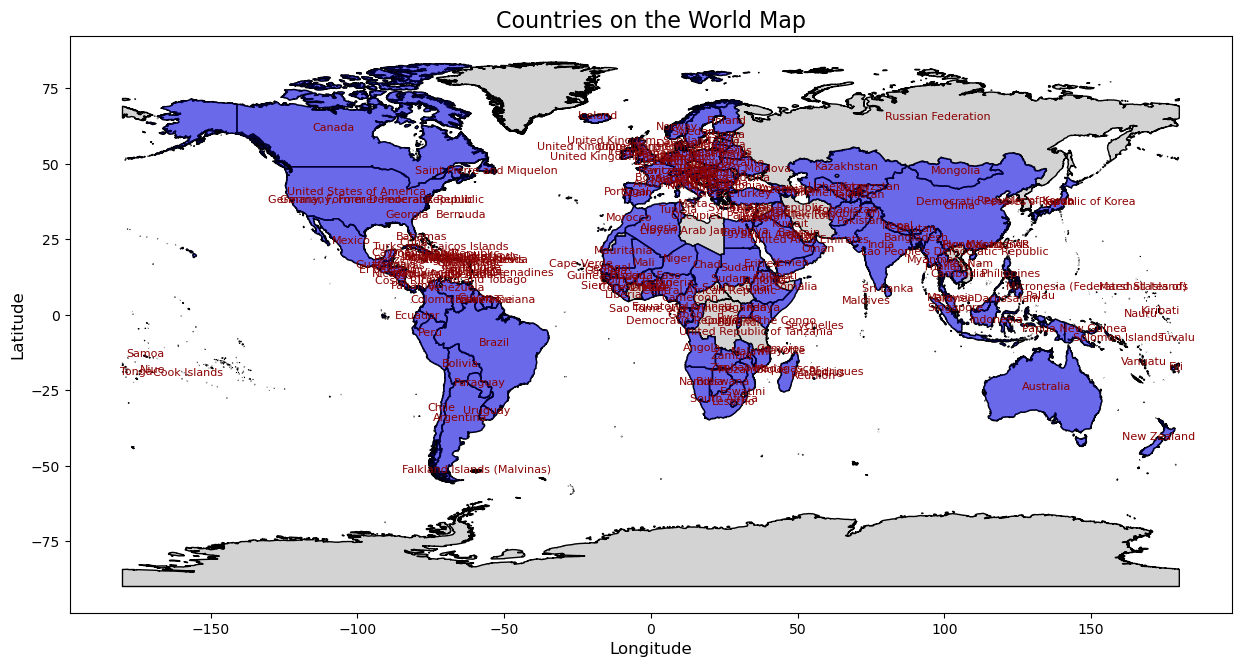

In [53]:
#import geopandas as gpd
#import matplotlib.pyplot as plt

# Convert the DataFrame to a GeoDataFrame if not already done
geo_df = gpd.GeoDataFrame(
    geo_df, 
    geometry=geo_df['geometry'], 
    crs="EPSG:4326"  # Ensure the correct coordinate reference system
)

# Create a base world map
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Load the Natural Earth shapefile
shapefile_path = Path("data/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp")  # Replace with the actual path
world = gpd.read_file(shapefile_path)


# Plot the base map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Overlay the countries from geo_df
geo_df.plot(
    ax=ax, 
    color='blue', 
    edgecolor='black', 
    alpha=0.5,  # Transparency for overlay
    legend=True
)

# Add annotations for each country
for idx, row in geo_df.iterrows():
    plt.text(
        row['Longitude'], 
        row['Latitude'], 
        row['Country_name'], 
        fontsize=8, 
        ha='center', 
        color='darkred'
    )

# Add title and labels
plt.title("Countries on the World Map", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)

# Show the plot
plt.show()
